<a href="https://colab.research.google.com/github/reni-hristova/Classification-Fashion-MNIST/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"Import and rename libraries needed for all models"
import tensorflow as tf
import numpy as np

import math
import matplotlib.pyplot as plt

## Import Keras dataset

In [ ]:
# Import Fashion MNIST dataset from Keras 
(train_set, train_labels), (test_set, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualisation

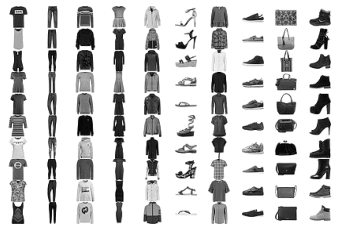

In [ ]:
# Visualisation
fig, ax = plt.subplots(10,10)
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(10):
    t = train_set[train_labels==i,:,:][0:10,:,:]
    for j in range(10):
        ax[j,i].imshow(t[j,:,:], cmap=plt.cm.binary)
        ax[j,i].set_axis_off()
plt.savefig('mnist-10x10.pdf')

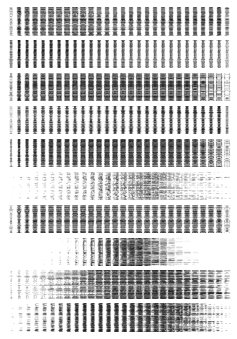

In [ ]:
fig, ax = plt.subplots(10,1,figsize=[4,6])
plt.subplots_adjust(wspace=0, hspace=0.1)
for i in range(10):
    t = np.random.permutation(train_set[train_labels==i,:,:])
    im = []
    for j in range(100):
        im.append(np.squeeze(np.reshape(t[j,:,:],(1,-1))))
    im = np.array(im)
    ax[i].imshow(np.array(im), cmap=plt.cm.binary)
    ax[i].set_axis_off()
plt.savefig('mnist-vectorised.pdf')

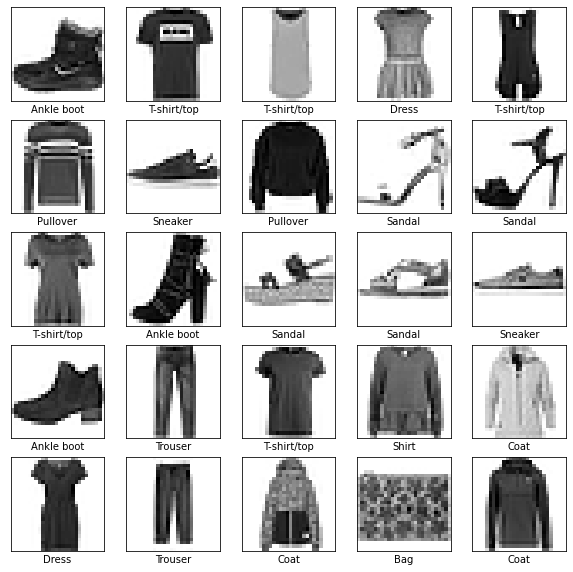

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Preprocessing

In [ ]:
# Normalise the values in the images to be between 0 and 1 (Normally the range is 0, 255)
train_set = train_set / 255.0
test_set = test_set / 255.0

# Vectorise the data
test_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))

In [ ]:
from sklearn.decomposition import PCA

# Build a PCA model to retain 97% of the information
pca = PCA(.97)

# Fit the model to the data
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Transform the data to reduce dimensionality using PCA 
train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

In [ ]:
# Check the number of features retained
print(train_set.shape)
print(test_set.shape)

(60000, 277)
(10000, 277)


# Logistic Regression

In [ ]:
# Import logistic regression and classificatio metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Set best accuracy to a small value initially
best_accuracy = - 1

# Define possible kernels
solver_list = ['sag', 'saga', 'lbfgs', 'newton-cg']

# Test each of the solvers with the different values of C 
for SOLVER in solver_list:
  for i in range(10, 26):
    C_HYPER = i/100

    # Create the model
    classifier = LogisticRegression(C = C_HYPER, max_iter = 10000, tol = 0.0001, n_jobs = -1, solver = SOLVER)
    classifier.fit(train_set, train_labels)

    # Predict labels for the test set
    predicted_labels = classifier.predict(test_set)

    print("\nTesting ", SOLVER, " solver with C = ", C_HYPER)
    print("\n Accuracy score for ", SOLVER, " solver with C = ", C_HYPER, " is ", accuracy_score(test_labels, predicted_labels))

    # If the accuracy is higher than the current best, update the highest accuracy and the best number of neighbours
    if (accuracy_score(test_labels, predicted_labels) > best_accuracy):
      best_accuracy = accuracy_score(test_labels, predicted_labels)
      best_params = [SOLVER, C_HYPER]

print("\nOptimisaion Finished. Best Score is ", best_accuracy, "\nBest parameters are ", best_params)

In [ ]:
# Assign optimised parameters to the hyperparameters for the model
SOLVER = best_params[0]
C_HYPER = best_params[1]

# Evaluation of the best model

In [ ]:
# Set hyperparameter for the optimised model (if you haven't ran the optimisation)
SOLVER = 'sag'
C = 0.15

# Create the model with the optimised parameters
classifier = LogisticRegression(C = C_HYPER, max_iter = 10000, tol = 0.0001, n_jobs = -1, solver = SOLVER)
classifier.fit(train_set, train_labels)

# Predict labels for the test set
predicted_labels = classifier.predict(test_set)

# Evaluate the model
confusion_matrix = confusion_matrix(test_labels, predicted_labels)

print("\n Accuracy score\n", accuracy_score(test_labels, predicted_labels))
print("\n Confusion Matrix\n", confusion_matrix)
print("\n Classification Report\n", classification_report(test_labels, predicted_labels))

0.8444


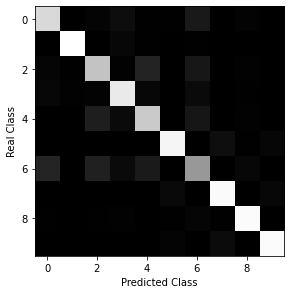

In [ ]:
# Visualise the Confusion Matrix
plt.imshow(confusion_matrix,cmap='gray')
plt.tight_layout()
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
print(sum(confusion_matrix.diagonal())/sum(sum(confusion_matrix)))